<a href="https://colab.research.google.com/gist/petrutaioana/cbf6de31463d2b2a6cecf31684ec198a/mps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Some IPython magic
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import seaborn as sns

sns.set_theme()

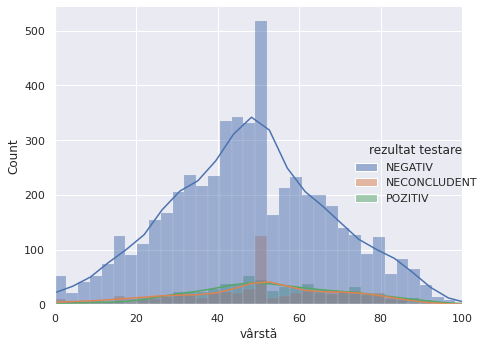

In [2]:
import re
# varsta -> df['vârstă']

sns.set(rc={'figure.figsize':(11.7,8.27)})

file_name = '/content/mps.dataset.xlsx'
df = pd.read_excel(file_name)

df = df.fillna({"vârstă": 52})
df["vârstă"] = df["vârstă"].astype(str)
df["vârstă"] = df["vârstă"].str.strip()
# L = numar de luni
# S = numar de spatamani
# A = numar de ani
# O = numar de ore
# Z = numar de zile
# NOU NASCUT = 0 ani

df['vârstă'] = df['vârstă'].str.replace(r'( Luni| LUNI| luni| LUNA| luna)', ' L')
df['vârstă'] = df['vârstă'].str.replace(r'(Luni|LUNI|luni|LUNA|luna)', ' L')
df['vârstă'] = df['vârstă'].str.replace(r'SAP', 'S')
df['vârstă'] = df['vârstă'].str.replace(r'ani|ANI|AN', 'A')
df['vârstă'] = df['vârstă'].str.replace(r'ORE|ore', 'O')
df['vârstă'] = df['vârstă'].str.replace(r' ZILE| zi', ' Z')
df['vârstă'] = df['vârstă'].str.replace(r'ZILE|zi', ' Z')
df['vârstă'] = df['vârstă'].str.replace(r'NOU NASCUT', '0')

def convert(age):
  age = list(age.split(" "))
  index = len(age) - 1
  sum = 0
  while index > 0:
    if age[index] == 'L':
      sum += int(age[index - 1]) / 12
      index -= 2
      continue
    if age[index] == 'A':
      sum += int(age[index - 1])
      index -= 2
      continue
    if age[index] == 'S':
      sum += int(age[index - 1]) / 52
      index -= 2
      continue
    if age[index] == 'O':
      sum += int(age[index - 1]) / 8760
      index -= 2
      continue
    index -= 1
  return str(sum)

df['vârstă'] = df['vârstă'].apply(lambda x: convert(x) if ' ' in x  else x)

df['vârstă'] = df['vârstă'].astype(float).astype(int)

# rezultat testare
df['rezultat testare'] = df['rezultat testare'].fillna('NECONCLUDENT')
df['rezultat testare'] = df['rezultat testare'].replace(['NEGATIB'], 'NEGATIV')

# some plot
sns.displot(x = df['vârstă'], hue = df['rezultat testare'], kde=True)
plt.xlim(0, 100)

plt.tight_layout()
# plt.gcf().set_size_inches(21, 14)

In [3]:
# sex
df['sex'] = df['sex'].str.replace(r'^(M|m).*$', 'M')
df['sex'] = df['sex'].str.replace(r'^(F|f).*$', 'F')

# cleanup_nums = {"sex":{"M": 0, "F": 1}}
# df = df.replace(cleanup_nums)

df = df.dropna(subset=['sex']) # we lost only 2 rows so it's cool
# print(df['sex'])
# print(len(df) - df['sex'].count()) -> we lost only 2 rows

In [4]:
# Some more changes to varsta, bc these asshole put 856 as an actual age...
index_names = df[ df['vârstă'] > 100].index 
df.drop(index_names, inplace = True)

print(df[['vârstă']][df['vârstă']==df['vârstă'].max()])

      vârstă
1079      99


In [5]:
# Find some gender ratio
print(df["sex"].value_counts())

F    3723
M    2717
Name: sex, dtype: int64


In [6]:
# simptome declarate -> just the important ones df['fever'], df['cough'], df['diarrhea'], df['muscle_soreness']
# print(df["simptome declarate"].value_counts())
df['simptome declarate'] = df['simptome declarate'].fillna('X')
df["simptome declarate"] = df["simptome declarate"].str.strip()
df['simptome declarate'] = df['simptome declarate'].str.replace(r'.*(ASIMPTOMATICA|ASIMPTOMATICĂ|Asimptomatica|ASIMPTOMATIC|Asimptomatic|asimptomatic|asimptomatica).*', 'X')
df['simptome declarate'] = df['simptome declarate'].str.replace(r'(-|nu are)', 'X')
df['simptome declarate'] = df['simptome declarate'].str.lower()
#print(df["simptome declarate"].unique())

df['fever'] = df['simptome declarate'].apply(lambda x: True if 'febra' in str(x) else False)
df['cough'] = df['simptome declarate'].apply(lambda x: True if 'tuse' in str(x) else False)
df['diarrhea'] = df['simptome declarate'].apply(lambda x: True if 'diaree' in str(x) else False)
df['muscle_soreness'] = df['simptome declarate'].apply(lambda x: True if 'musculare' in str(x) else False)

# simptome raportate la internare -> just the important ones, a merge with the ones from above should be done
# df['fever_internare'], df['cough_internare'], df['diarrhea_internare'], df['muscle_soreness_internare']
df['simptome raportate la internare'] = df['simptome raportate la internare'].fillna('X')
df["simptome raportate la internare"] = df["simptome raportate la internare"].str.strip()
df["simptome raportate la internare"] = df["simptome raportate la internare"].str.replace(r'.*(ASIMPTOMATICA|ASIMPTOMATICĂ|Asimptomatica|ASIMPTOMATIC|Asimptomatic|asimptomatic|asimptomatica).*', 'X')
df["simptome raportate la internare"] = df["simptome raportate la internare"].str.replace(r'(-|nu are)', 'X')
df["simptome raportate la internare"] = df["simptome raportate la internare"].str.lower()

df['fever_internare'] = df['simptome raportate la internare'].apply(lambda x: 1 if 'febra' in str(x) else 0)
df['cough_internare'] = df['simptome raportate la internare'].apply(lambda x: 1 if 'tuse' in str(x) else 0)
df['diarrhea_internare'] = df['simptome raportate la internare'].apply(lambda x: 1 if 'diaree' in str(x) else 0)
df['muscle_soreness_internare'] = df['simptome raportate la internare'].apply(lambda x: 1 if 'musculare' in str(x) else 0)

#sns.displot(x = df['diarrhea_internare'], hue = df['rezultat testare'], kde=True)

# diagnostic și semne de internare -> TODO

# instituția sursă ? drop
df.drop('instituția sursă', 1)
# dată debut simptome declarate ? drop
df.drop('dată debut simptome declarate', 1)
# dată internare ? drop
df.drop('dată internare', 1)
# data rezultat testare ? drop
df.drop('data rezultat testare', 1)

# istoric de calatorie -> df['travel_history']
# print(df['istoric de călătorie'].unique())
df['istoric de călătorie'] = df['istoric de călătorie'].fillna('none')
df["istoric de călătorie"] = df["istoric de călătorie"].str.strip()
df["istoric de călătorie"] = df["istoric de călătorie"].str.lower()
df['istoric de călătorie'] = df['istoric de călătorie'].str.replace(r'(asimptomatic|ne|nu|nu e cazul|neaga|neagă|nu a calatorit|nu  este cazul|nu are|fara|0|mu|durere).*', 'none')
df['travel_history'] = df['istoric de călătorie'].apply(lambda x: False if 'none' in str(x) else True)
# print(df['travel_history'].value_counts())
# print(df['istoric de călătorie'].value_counts())

In [7]:
# mijloace de transport folosite -> df['travel_history_2']
df['mijloace de transport folosite'] = df['mijloace de transport folosite'].fillna('xx')
df["mijloace de transport folosite"] = df["mijloace de transport folosite"].str.strip()
df["mijloace de transport folosite"] = df["mijloace de transport folosite"].str.lower()
df['mijloace de transport folosite'] = df['mijloace de transport folosite'].str.replace(r'^nu.*', 'xx')
df['mijloace de transport folosite'] = df['mijloace de transport folosite'].str.replace(r'^(o|0|fara|masina personala|masina|afebril, neo vezical)$', 'xx')
df['travel_history_2'] = df['mijloace de transport folosite'].apply(lambda x: False if 'xx' in str(x) else True)
#print(df['travel_history_2'].value_counts())


# confirmare contact cu o persoană infectată -> df['contact']
df['confirmare contact cu o persoană infectată'] = df['confirmare contact cu o persoană infectată'].fillna('xx')
df["confirmare contact cu o persoană infectată"] = df["confirmare contact cu o persoană infectată"].str.strip()
df["confirmare contact cu o persoană infectată"] = df["confirmare contact cu o persoană infectată"].str.lower()
df['confirmare contact cu o persoană infectată'] = df['confirmare contact cu o persoană infectată'].str.replace(r'^nu.*', 'xx')
df['confirmare contact cu o persoană infectată'] = df['confirmare contact cu o persoană infectată'].str.replace(r'^(-|o|0|fara|venita din lombardia|nou nascut din mama hiv pozitiva)$', 'xx')
# print(df['confirmare contact cu o persoană infectată'].value_counts())
df['contact'] = df['confirmare contact cu o persoană infectată'].apply(lambda x: False if 'xx' in str(x) else True)
# print(df['contact'].value_counts())